Inspirado en: https://dododas.github.io/linear-algebra-with-python/posts/16-10-22-linear-equations-in-2d.html


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# Change default color cycle (optional - may not work with older versions of matplotlib)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#377eb8","#ff7f00", "#4daf4a", 
                                                    "#e41a1c", "#984ea3", "#a65628"]) 

In [3]:
# This function assigns a unique color based on position
def colorizer(x, y):
    """
    Map x-y coordinates to a rgb color
    """
    r = min(1, 1-x/3)
    g = min(1, 1+x/3)
    b = 1/4 + y/16
    return (r, g, b)

Text(0.5, 1.0, 'Column space visualization')

<Figure size 640x480 with 0 Axes>

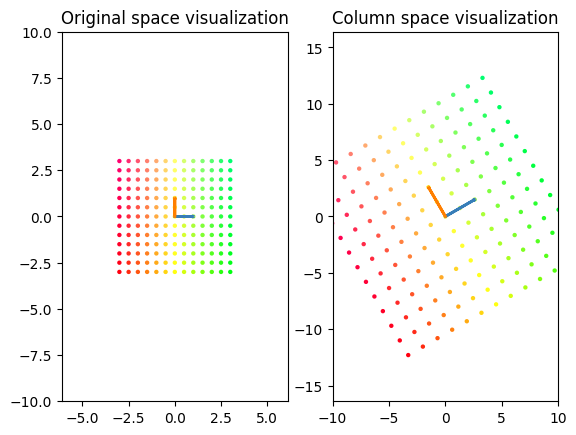

In [4]:
# Canonical basis
e1 = np.array([1, 0])
e2 = np.array([0, 1])

# Scaled 
v1_esc = e1 * 3
v2_esc = e2 * 3
Aesc = np.column_stack((v1_esc, v2_esc))

# Rotated
angle = np.deg2rad(30)
R = np.array([[np.cos(angle), -np.sin(angle)],
               [np.sin(angle), np.cos(angle)]])
v1_rot = R @ e1
v2_rot = R @ e2
Arot = np.column_stack((v1_rot, v2_rot))

# Reflexion
v1_refl = np.array([-1, 0])
v2_refl = np.array([0, 1])
Arefl = np.column_stack((v1_refl, v2_refl))

# Generate linear transform matrix + transform points
A = Aesc @ Arot
v1 = A @ e1
v2 = A @ e2
xvals = np.array(range(-6,7,1))*0.5
yvals = np.array(range(-6,7,1))*0.5
grid = np.column_stack([[x, y] for x in xvals for y in yvals])
lc = A @ grid

# Map grid coordinates to colors
colors = list(map(colorizer, grid[0], grid[1]))

# Plot results
plt.figure()
fig,ax=plt.subplots(1,2)

# plot original grid
plt.subplot(1, 2, 1)
#plt.plot(grid[0], grid[1], ".", color="blue", ms=2)
plt.scatter(grid[0], grid[1], s=10, c=colors, edgecolor="none")
ax[0].axis("equal")
#plt.xlim([-4, 4])
#plt.ylim([-4, 4])
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.arrow(0, 0, e1[0], e1[1], color="#377eb8", lw=2)
plt.arrow(0, 0, e2[0], e2[1], color="#ff7f00", lw=2)
plt.title("Original space visualization")

# plot linear combinations
plt.subplot(1, 2, 2)
#plt.plot(lc[0], lc[1], ".", color="red", ms=2)
plt.scatter(lc[0], lc[1], s=10, c=colors, edgecolor="none")
ax[1].axis("equal")
#plt.xlim([-4, 4])
#plt.ylim([-4, 4])
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.arrow(0, 0, v1[0], v1[1], color="#377eb8", lw=2)
plt.arrow(0, 0, v2[0], v2[1], color="#ff7f00", lw=2)
plt.title("Column space visualization")
